<a href="https://colab.research.google.com/github/NadhemBenhadjali/Financial-Inclusion-in-Africa/blob/main/Financial_Inclusion_in_Africa_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ***Financial Inclusion in Africa***

Financial inclusion remains one of the main obstacles to economic and human development in Africa. For example, across Kenya, Rwanda, Tanzania, and Uganda only 9.1 million adults (or 14% of adults) have access to or use a commercial bank account.

Traditionally, access to bank accounts has been regarded as an indicator of financial inclusion. Despite the proliferation of mobile money in Africa, and the growth of innovative fintech solutions, banks still play a pivotal role in facilitating access to financial services. Access to bank accounts enable households to save and make payments while also helping businesses build up their credit-worthiness and improve their access to loans, insurance, and related services. Therefore, access to bank accounts is an essential contributor to long-term economic growth.

The objective of this project is to create a machine learning model to predict which individuals are most likely to have or use a bank account. The models and solutions developed can provide an indication of the state of financial inclusion in Kenya, Rwanda, Tanzania and Uganda, while providing insights into some of the key factors driving individuals’ financial security.



This is my simple starter notebook to get started with the Financial Inclusion Competition on Zindi!


In [ ]:
import numpy as np
import pandas as pd
import plotly.express as px
import plotly.figure_factory as ff
import seaborn as sns
import matplotlib.pyplot as plt
import math
from sklearn import preprocessing
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from matplotlib import pyplot as plt
from sklearn.preprocessing import LabelEncoder

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Data Loading and Preprocessing

In [ ]:
# Loading the dataset
train =pd.read_csv("/content/drive/MyDrive/africa/Train.csv")
test =pd.read_csv("/content/drive/MyDrive/africa/Test.csv")
Sub=pd.read_csv("/content/drive/MyDrive/africa/SampleSubmission.csv")
Var=pd.read_csv("/content/drive/MyDrive/africa/VariableDefinitions.csv")
train1=train.copy()


In [ ]:
# let's look at the variables
Var

,Variable Definitions,Unnamed: 1
0,country,Country interviewee is in.
1,year,Year survey was done in.
2,uniqueid,Unique identifier for each interviewee
3,location_type,"Type of location: Rural, Urban"
4,cellphone_access,"If interviewee has access to a cellphone: Yes, No"
5,household_size,Number of people living in one house
6,age_of_respondent,The age of the interviewee
7,gender_of_respondent,"Gender of interviewee: Male, Female"
8,relationship_with_head,The interviewee’s relationship with the head o...
9,marital_status,The martial status of the interviewee: Married...


In [ ]:
# Let’s observe the shape of our datasets.
print('train data shape :', train.shape)
print('test data shape :', test.shape)

train data shape : (23524, 13)
test data shape : (10086, 12)


In [ ]:
train.isna().sum()

country                   0
year                      0
uniqueid                  0
bank_account              0
location_type             0
cellphone_access          0
household_size            0
age_of_respondent         0
gender_of_respondent      0
relationship_with_head    0
marital_status            0
education_level           0
job_type                  0
dtype: int64

No missing values !

In [ ]:
for i in train.columns:
    print(train[i].value_counts())

Rwanda      8735
Tanzania    6620
Kenya       6068
Uganda      2101
Name: country, dtype: int64
2016    8735
2018    8169
2017    6620
Name: year, dtype: int64
uniqueid_1       4
uniqueid_1413    4
uniqueid_1411    4
uniqueid_1410    4
uniqueid_1409    4
                ..
uniqueid_7318    1
uniqueid_7317    1
uniqueid_7316    1
uniqueid_7315    1
uniqueid_8759    1
Name: uniqueid, Length: 8735, dtype: int64
No     20212
Yes     3312
Name: bank_account, dtype: int64
Rural    14343
Urban     9181
Name: location_type, dtype: int64
Yes    17454
No      6070
Name: cellphone_access, dtype: int64
2     5229
3     3920
4     3474
1     3057
5     2853
6     2096
7     1400
8      751
9      363
10     190
11      69
12      68
13      25
15      11
14      10
16       4
21       1
18       1
17       1
20       1
Name: household_size, dtype: int64
30     1056
35      836
25      792
28      748
32      715
       ... 
100       5
93        4
96        3
99        2
97        1
Name: age_of_re

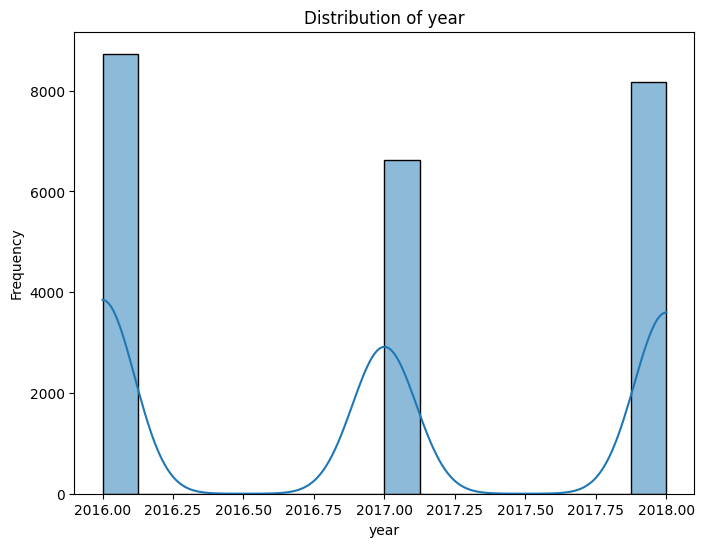

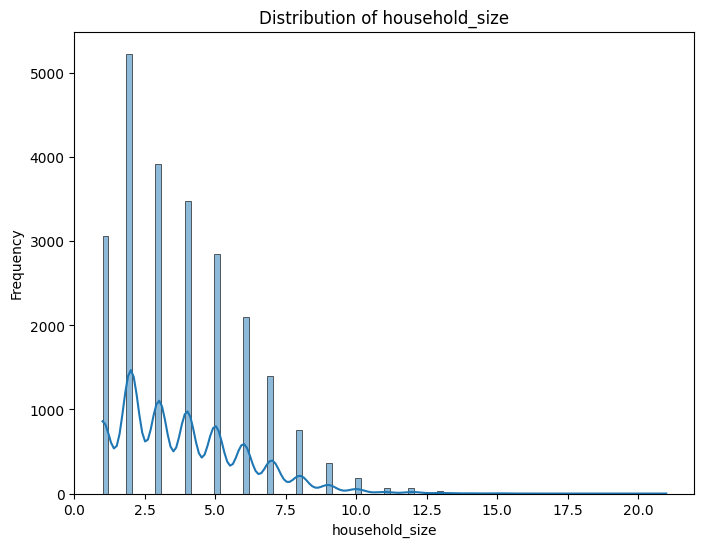

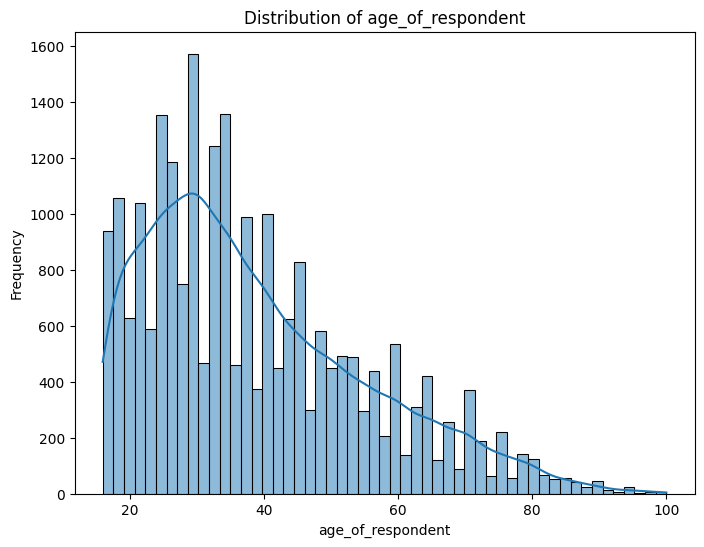

In [ ]:
numerical_features = train.select_dtypes(include=['int64', 'float64']).columns

# Step 3: Visualize distributions
for feature in numerical_features:
    plt.figure(figsize=(8, 6))
    sns.histplot(train[feature], kde=True)
    plt.title(f'Distribution of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Frequency')
    plt.show()




1.*One notable observation is that the dataset primarily consists of young individuals. Therefore, the lack of a significant correlation between age and the possession of a bank account, as indicated in the correlation matrix, can be attributed to this demographic skew.*

2.**as we can see , we should normalize the distribution of age_of_respondent and the house hold size.**





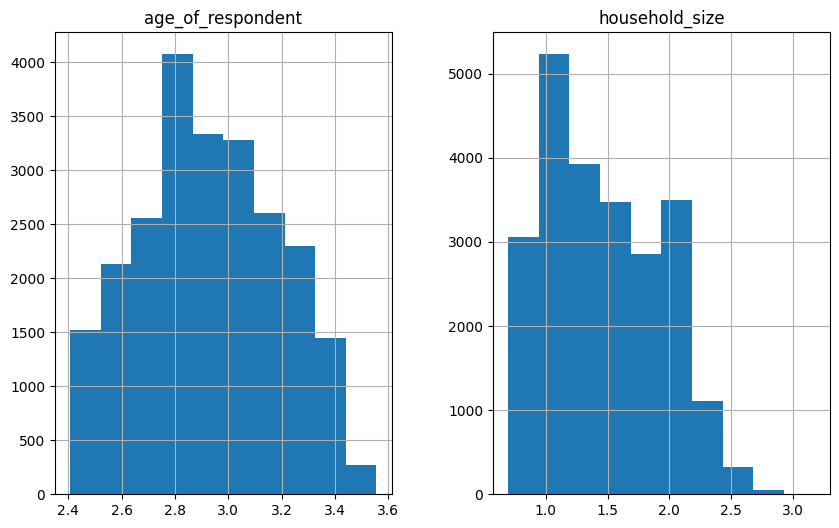

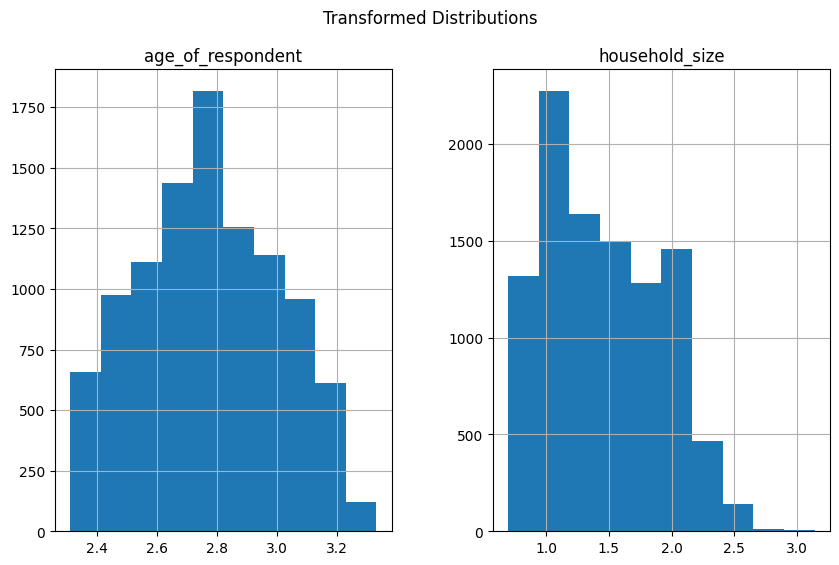

In [ ]:
from scipy.stats import boxcox
# Define the features to transform
features_to_transform = ['age_of_respondent', 'household_size']
# Apply Box-Cox transformation
for feature in features_to_transform:
    train[feature] = boxcox(train[feature] + 1)[0]
    test[feature] = boxcox(test[feature] + 1)[0]  # Adding 1 to handle zero values

# Visualize the transformed distributions
train[features_to_transform].hist(figsize=(10, 6))
test[features_to_transform].hist(figsize=(10, 6))
plt.suptitle('Transformed Distributions')
plt.show()

# **Location_type**

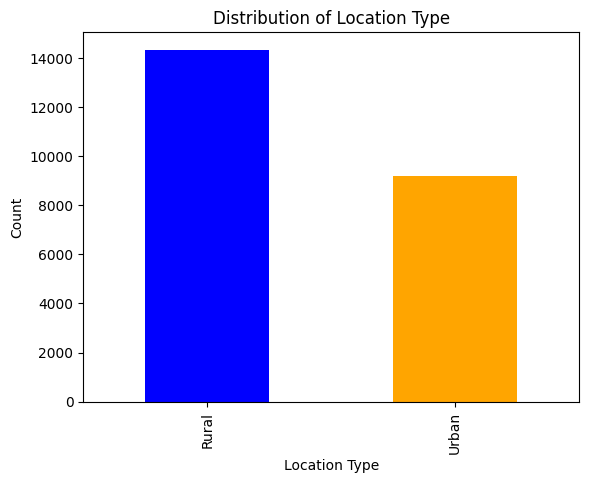

In [ ]:
train['location_type'].value_counts().plot(kind='bar', color=['blue', 'orange'])
plt.title('Distribution of Location Type')
plt.xlabel('Location Type')
plt.ylabel('Count')
plt.show()


We can observe that the location_type is unbalanced.

To address the issue of unbalanced location types, let's apply oversampling.

**Sampling**

In [ ]:
original_order = [
    'country', 'year', 'uniqueid', 'bank_account', 'location_type',
    'cellphone_access', 'household_size', 'age_of_respondent',
    'gender_of_respondent', 'relationship_with_head', 'marital_status',
    'education_level', 'job_type'
]

# Reset the columns to the original order
train = train.reindex(columns=original_order)
print(train)

      country  year       uniqueid bank_account location_type  \
0       Kenya  2018     uniqueid_1          Yes         Rural   
1       Kenya  2018     uniqueid_2           No         Rural   
2       Kenya  2018     uniqueid_3          Yes         Urban   
3       Kenya  2018     uniqueid_4           No         Rural   
4       Kenya  2018     uniqueid_5           No         Urban   
...       ...   ...            ...          ...           ...   
23519  Uganda  2018  uniqueid_2113           No         Rural   
23520  Uganda  2018  uniqueid_2114           No         Rural   
23521  Uganda  2018  uniqueid_2115           No         Rural   
23522  Uganda  2018  uniqueid_2116           No         Urban   
23523  Uganda  2018  uniqueid_2117           No         Rural   

      cellphone_access  household_size  age_of_respondent  \
0                  Yes        1.402690           2.676749   
1                   No        1.819212           3.347610   
2                  Yes        1.8192

In [ ]:
id0=train['uniqueid']
id1=test['uniqueid']
countrytest=test["country"]
train.drop('uniqueid', axis=1, inplace=True)
test.drop('uniqueid', axis=1, inplace=True)
cols=list(train.select_dtypes(exclude=['float', 'int']).columns)
cols.remove('bank_account')
L1=[list(train[i].value_counts().index) for i in cols]

In [ ]:
label_encoder = preprocessing.LabelEncoder()
for i in  cols:
  train[i] = label_encoder.fit_transform(train[i])
  test[i] = label_encoder.fit_transform(test[i])
train["bank_account"].replace(("Yes","No"),(1,0),inplace=True)
train["education_level"].replace((2, 0, 3, 4, 5, 1),(2,1,3,5,4,0),inplace=True)
test["education_level"].replace((2, 0, 3, 4, 5, 1),(2,1,3,5,4,0),inplace=True)
train.dtypes

country                     int64
year                        int64
bank_account                int64
location_type               int64
cellphone_access            int64
household_size            float64
age_of_respondent         float64
gender_of_respondent        int64
relationship_with_head      int64
marital_status              int64
education_level             int64
job_type                    int64
dtype: object

In [ ]:
L=[train[i].value_counts().index for i in cols ]
category_dict = {cols[i]:{L[i][j]:L1[i][j] for j in range(len(L1[i]))} for i in range(len(L))}
print(category_dict)

{'country': {1: 'Rwanda', 2: 'Tanzania', 0: 'Kenya', 3: 'Uganda'}, 'location_type': {0: 'Rural', 1: 'Urban'}, 'cellphone_access': {1: 'Yes', 0: 'No'}, 'gender_of_respondent': {0: 'Female', 1: 'Male'}, 'relationship_with_head': {1: 'Head of Household', 5: 'Spouse', 0: 'Child', 4: 'Parent', 3: 'Other relative', 2: 'Other non-relatives'}, 'marital_status': {2: 'Married/Living together', 3: 'Single/Never Married', 4: 'Widowed', 0: 'Divorced/Seperated', 1: 'Dont know'}, 'education_level': {2: 'Primary education', 1: 'No formal education', 3: 'Secondary education', 5: 'Tertiary education', 4: 'Vocational/Specialised training', 0: 'Other/Dont know/RTA'}, 'job_type': {9: 'Self employed', 5: 'Informally employed', 1: 'Farming and Fishing', 8: 'Remittance Dependent', 7: 'Other Income', 3: 'Formally employed Private', 6: 'No Income', 2: 'Formally employed Government', 4: 'Government Dependent', 0: 'Dont Know/Refuse to answer'}}


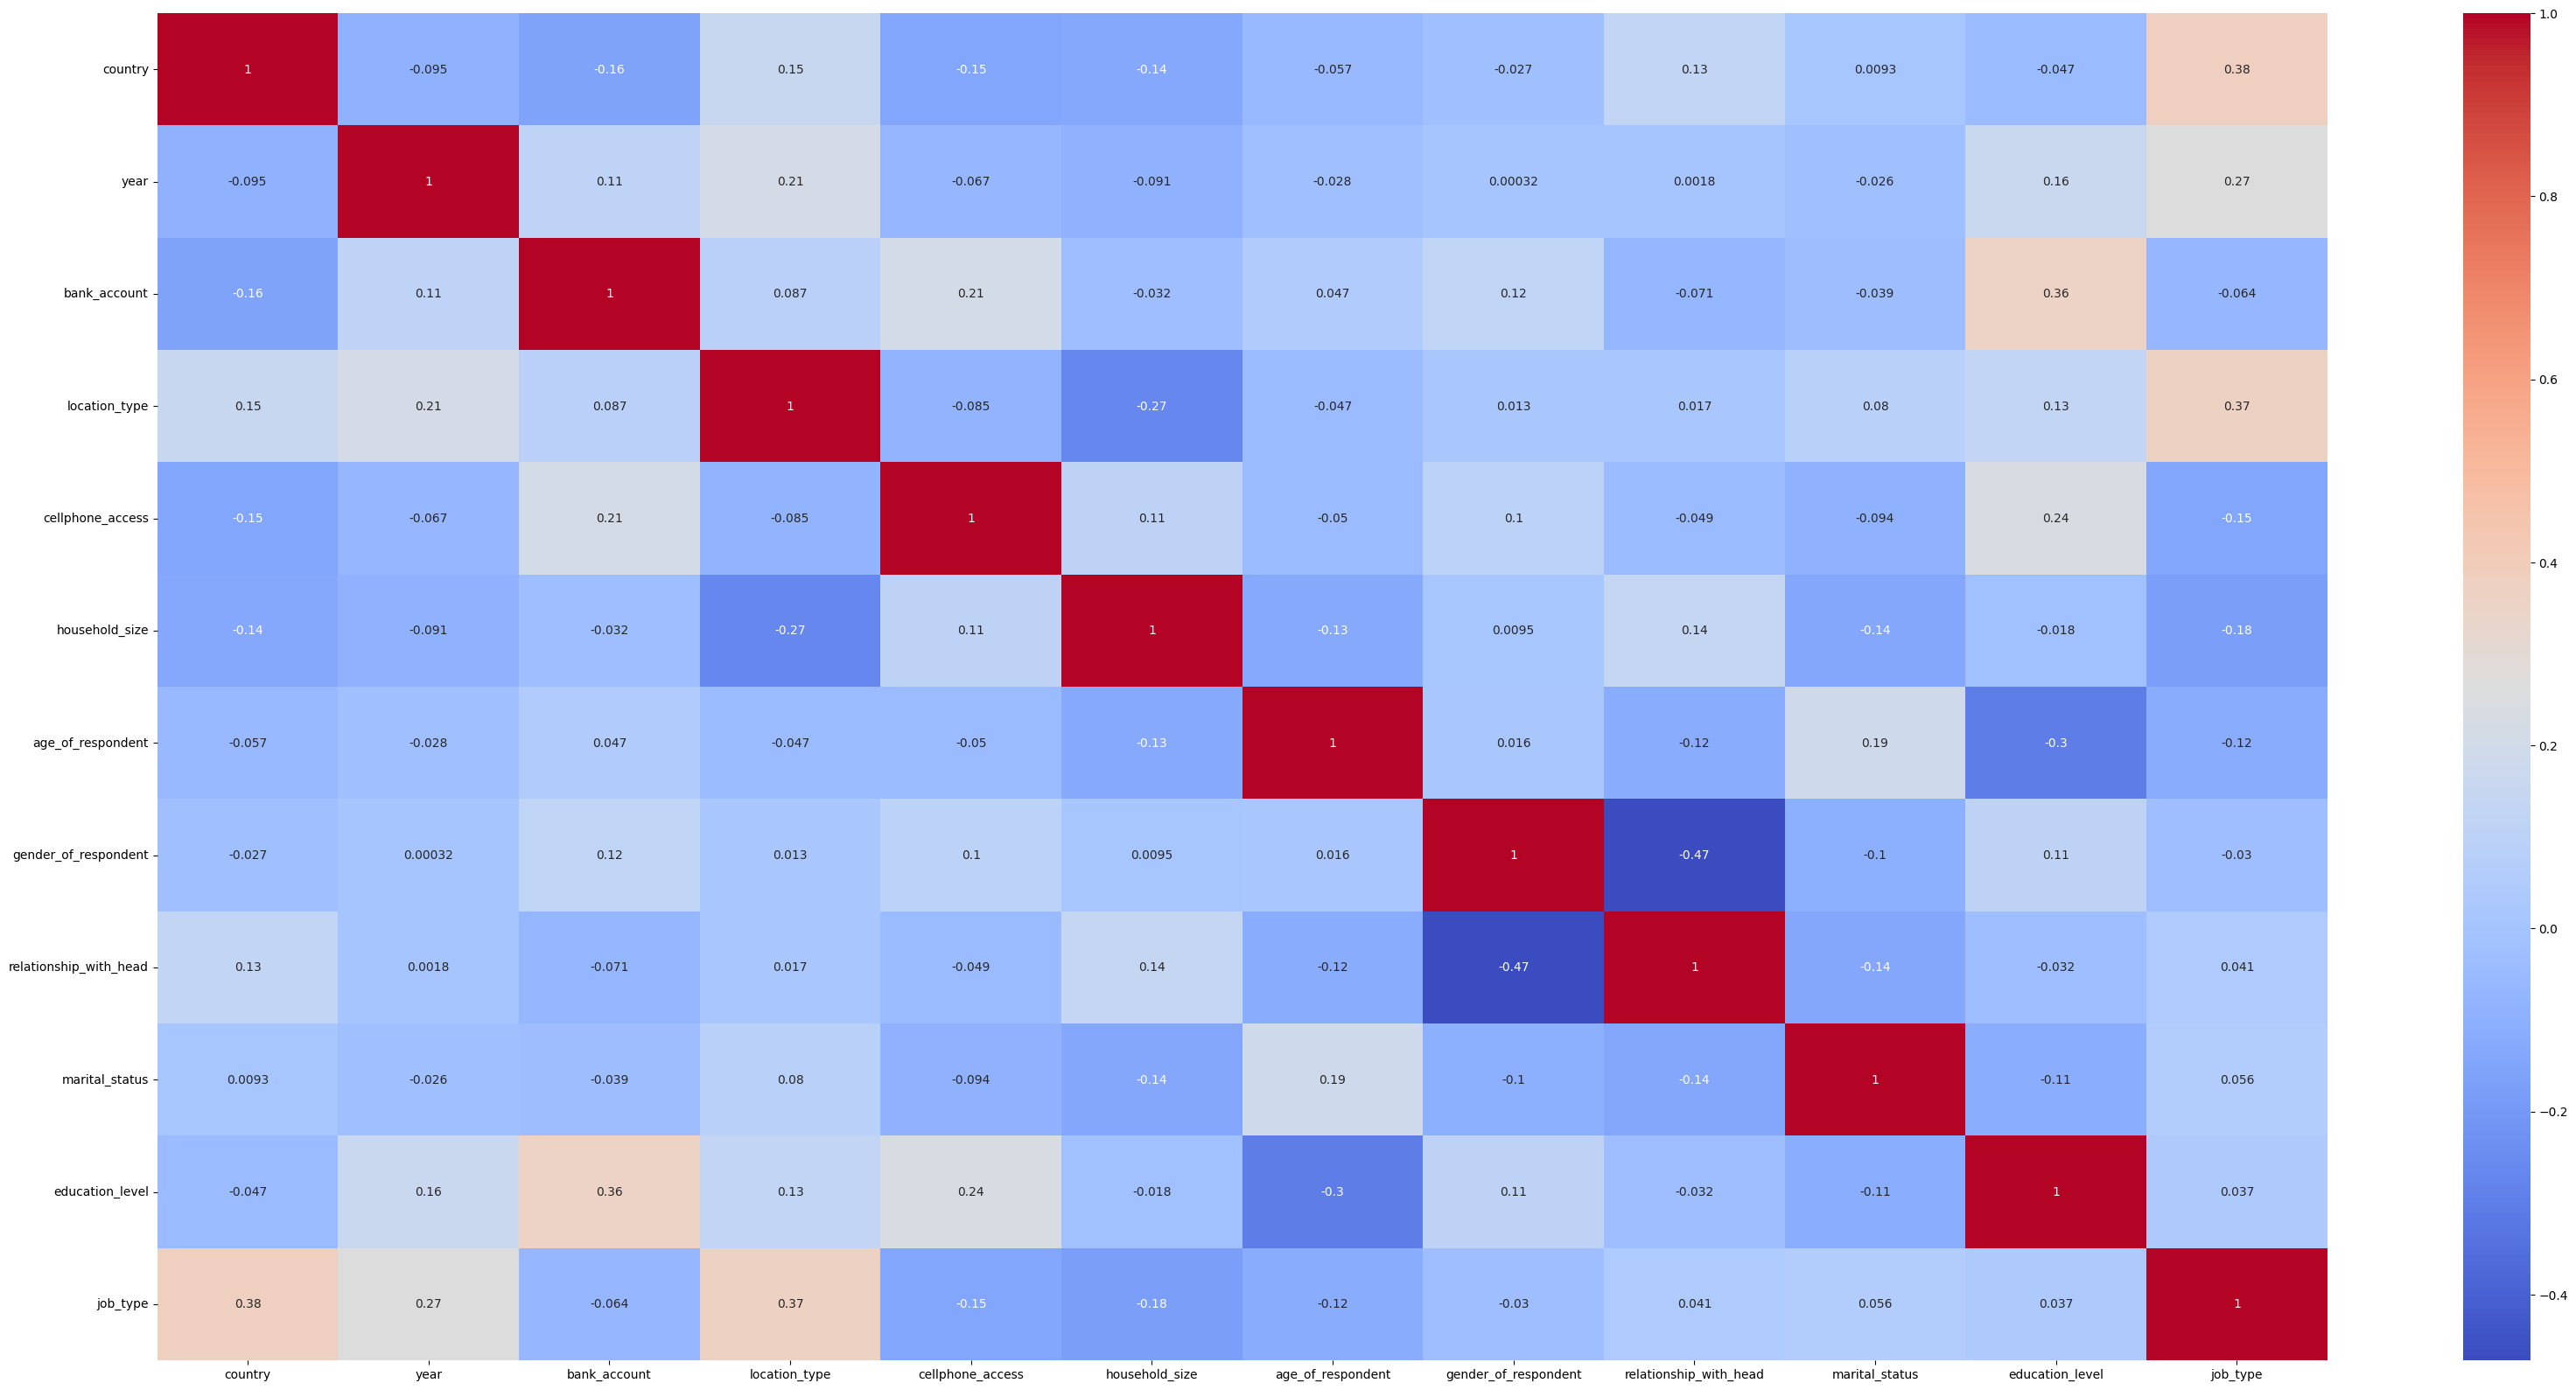

In [ ]:
correlation_matrix = train.corr()
plt.figure(figsize=(40, 20))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.show()

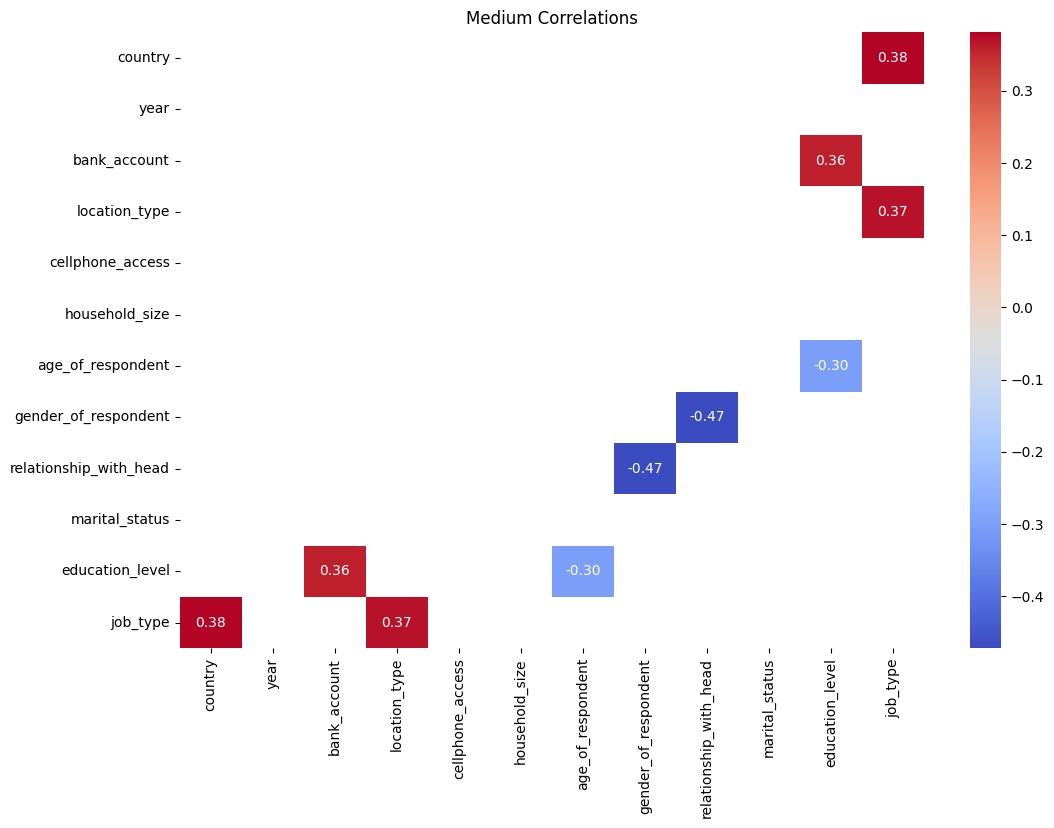

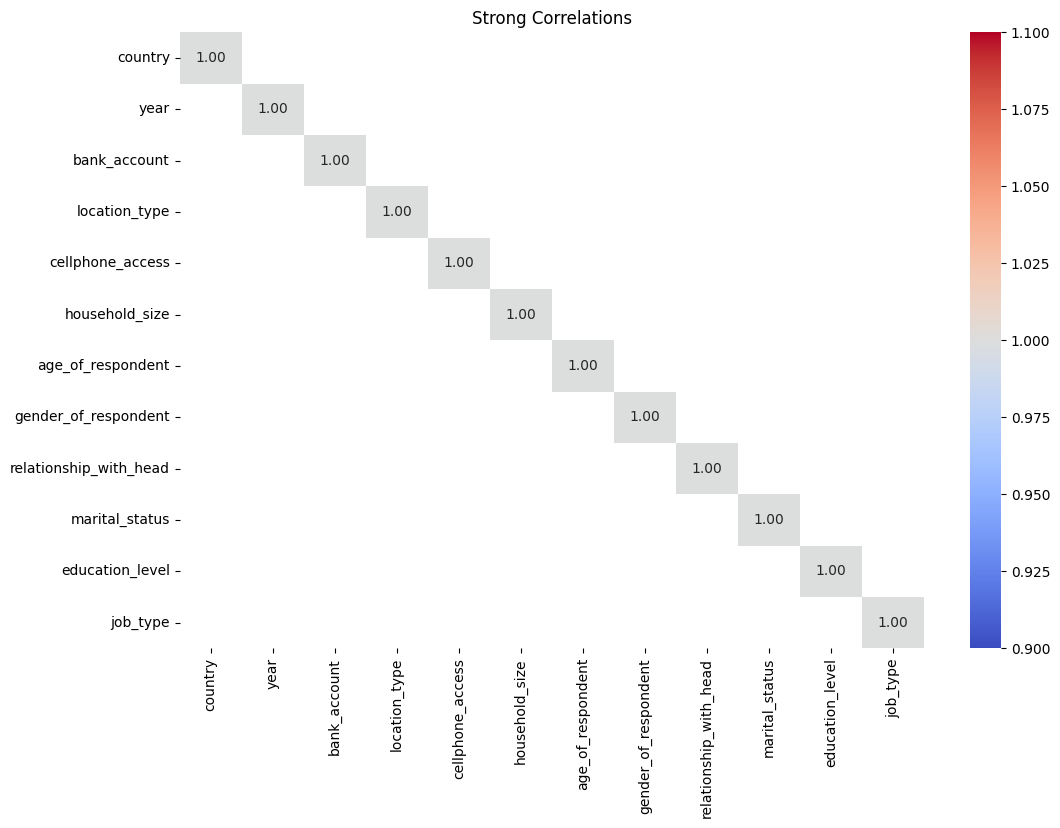

In [ ]:
# Set the threshold for medium and strong correlations
medium_threshold = 0.3
strong_threshold = 0.7

# Mask for medium correlations
medium_mask = (correlation_matrix.abs() >= medium_threshold) & (correlation_matrix.abs() < strong_threshold)

# Mask for strong correlations
strong_mask = correlation_matrix.abs() >= strong_threshold

# Plotting the heatmap for medium correlations
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix[medium_mask], annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Medium Correlations')
plt.show()

# Plotting the heatmap for strong correlations
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix[strong_mask], annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Strong Correlations')
plt.show()


There is no strong correlations but we can see that there a relation between having an account and educationnel level.

# ***`Bank Account vs. Education Level`***

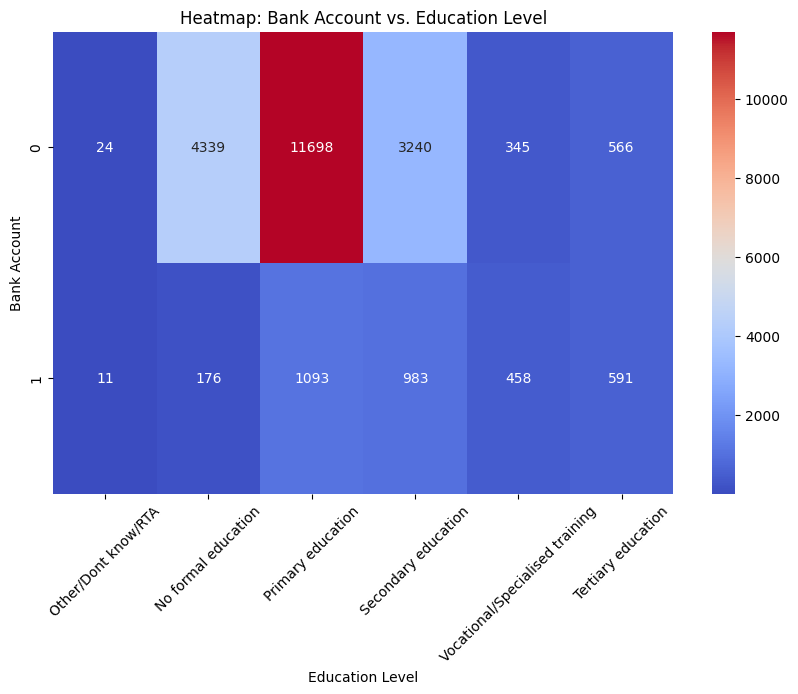

In [ ]:
cross_tab = pd.crosstab(train['bank_account'], train['education_level'])
# Plot the heatmap
plt.figure(figsize=(10, 6))
heatmap=sns.heatmap(cross_tab, annot=True, cmap='coolwarm', fmt='d', cbar=True)
heatmap.set_xticklabels([category_dict['education_level'][level] for level in cross_tab.columns ], rotation=45)
plt.title('Heatmap: Bank Account vs. Education Level')
plt.xlabel('Education Level')
plt.ylabel('Bank Account')
plt.show()


We can observe that the majority of individuals with primary education, secondary education, and no formal education do not have a bank account.

# ***Bank Account vs Gender***

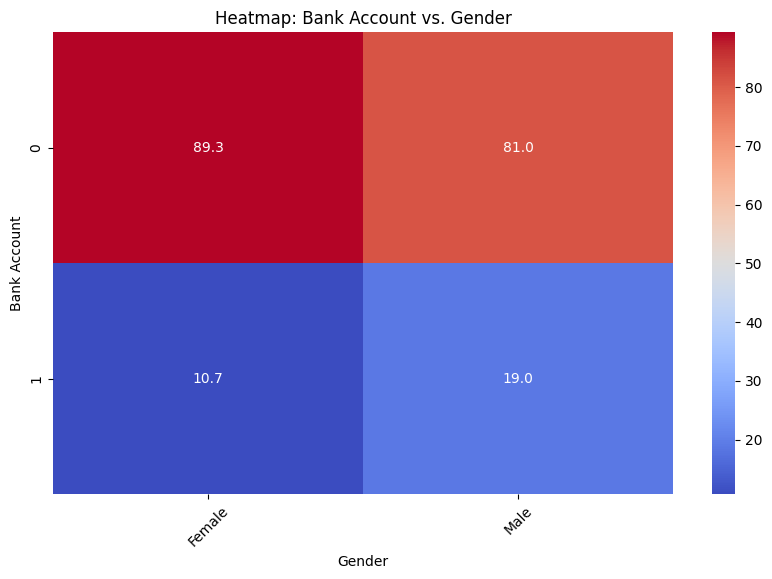

In [ ]:
cross_tab = pd.crosstab(train['bank_account'], train['gender_of_respondent'],normalize='columns') * 100
# Plot the heatmap
plt.figure(figsize=(10, 6))
heatmap=sns.heatmap(cross_tab, annot=True, cmap='coolwarm', fmt='.1f', cbar=True)
heatmap.set_xticklabels([category_dict['gender_of_respondent'][level] for level in cross_tab.columns ], rotation=45)
plt.title('Heatmap: Bank Account vs. Gender')
plt.xlabel('Gender')
plt.ylabel('Bank Account')
plt.show()


The percentage of male with a bank account is not that bigger than the percentage of the other gender.

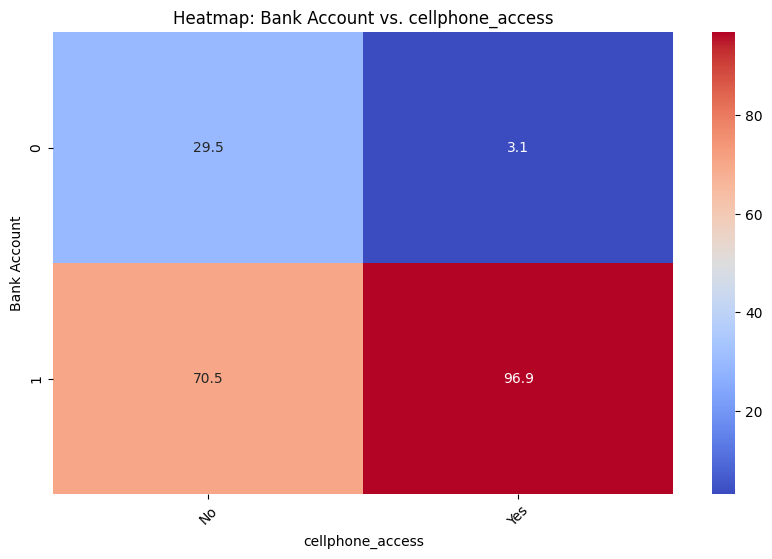

In [ ]:
cross_tab = pd.crosstab(train['cellphone_access'],train['bank_account'],normalize='columns') * 100
# Plot the heatmap
plt.figure(figsize=(10, 6))
heatmap=sns.heatmap(cross_tab, annot=True, cmap='coolwarm', fmt='.1f', cbar=True)
heatmap.set_xticklabels([category_dict['cellphone_access'][level] for level in cross_tab.columns ], rotation=45)
plt.title('Heatmap: Bank Account vs. cellphone_access')
plt.xlabel('cellphone_access')
plt.ylabel('Bank Account')
plt.show()


It is indeed remarkable! There exists a robust correlation between the possession of a bank account and access to a cellphone, a relationship that aligns well with logical expectations.

# **Job Type Vs bank_account**

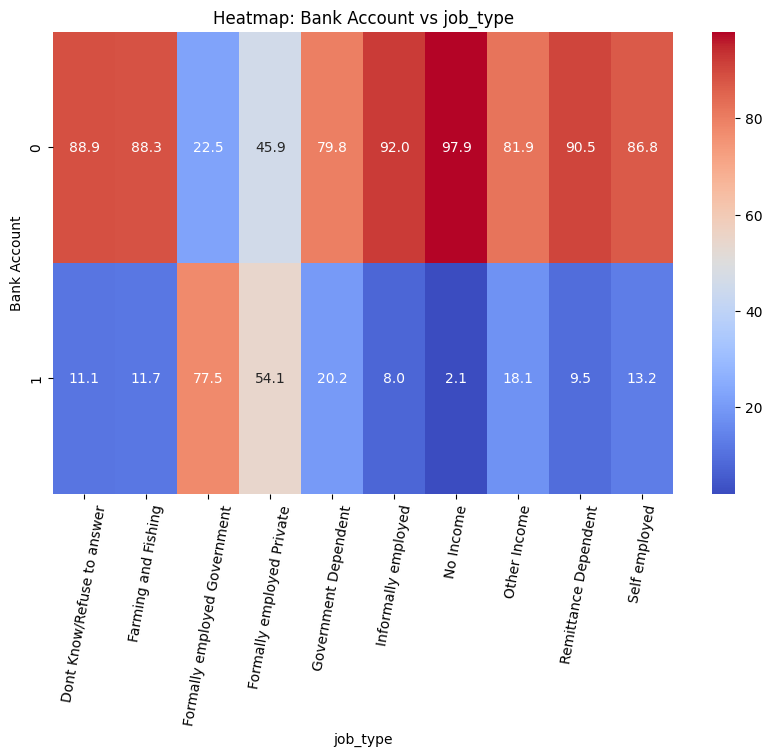

In [ ]:
# Create a pivot table for the cross-tabulation of the two columns
cross_tab = pd.crosstab(train['bank_account'], train['job_type'],normalize='columns') * 100
# Plot the heatmap
plt.figure(figsize=(10, 6))
heatmap=sns.heatmap(cross_tab, annot=True, cmap='coolwarm', fmt='.1f', cbar=True)
heatmap.set_xticklabels([category_dict['job_type'][level] for level in cross_tab.columns ], rotation=80)
plt.title('Heatmap: Bank Account vs job_type')
plt.xlabel('job_type')
plt.ylabel('Bank Account')
plt.show()


Individuals categorized as having no income, informally employed, dependent on remittances, or engaged in farming and fishing generally do not possess a bank account. Conversely, those formally employed by the government are more likely to have a bank account as a requirement of their employment.

**Conclusion :**
1. Individuals with primary, secondary, or no formal education tend not to have a bank account.

2. There is no significant difference in bank account ownership between genders.

3. Access to a cellphone correlates strongly with bank account ownership.

4. The dataset primarily consists of young individuals, which may explain the lack of correlation between age and bank account ownership.

5. Individuals without income, informally employed, dependent on remittances, or engaged in farming and fishing generally do not possess bank accounts, while those formally employed by the government typically do.
6.  the location_type is unbalanced.






# **Model selection and trainings**

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import train_test_split
y_train=train["bank_account"]
train.drop('bank_account', axis=1, inplace=True)
X_train, X_test, y_train, y_test = train_test_split(train, y_train, test_size=0.2, random_state=20)

oversampling

In [ ]:
from imblearn.over_sampling import SMOTE, ADASYN  # Import for oversampling

# Using SMOTE for oversampling
# smote = SMOTE(random_state=42)

# Using ADASYN for oversampling
adasyn = ADASYN(random_state=42)

# Perform oversampling on training data using SMOTE
# X_train_resampled_smote, y_train_resampled_smote = smote.fit_resample(X_train, y_train)

# Perform oversampling on training data using ADASYN
X_train_resampled_adasyn, y_train_resampled_adasyn = adasyn.fit_resample(X_train, y_train)

# Convert the resampled training data back to DataFrame if needed
# train = pd.DataFrame(X_train_resampled_smote, columns=X_train.columns)
# train['location_type'] = y_train_resampled_smote

train= pd.DataFrame(X_train_resampled_adasyn, columns=X_train.columns)
train['location_type'] = y_train_resampled_adasyn

# Check the distribution of the target variable after oversampling for SMOTE and ADASYN
# print("Training Data after SMOTE:")
# print(train['location_type'].value_counts())

print("Training Data after ADASYN:")
print(train['location_type'].value_counts())

# from imblearn.under_sampling import RandomUnderSampler  # Import for undersampling

# # Assuming 'train' and 'test' are your DataFrames containing the data
# X_train = train.drop(columns=['location_type'])  # Features for training
# y_train = train['location_type']  # Target variable for training

# # Instantiate RandomUnderSampler for undersampling
# undersampler = RandomUnderSampler(random_state=42)

# # Perform undersampling on training data
# X_train_resampled, y_train_resampled = undersampler.fit_resample(X_train, y_train)

# # Convert the resampled training data back to DataFrame if needed
# train = pd.DataFrame(X_train_resampled, columns=X_train.columns)
# train['location_type'] = y_train_resampled

# # Check the distribution of the target variable after undersampling for training data
# print("Training Data:")
# print(train['location_type'].value_counts())

Training Data after ADASYN:
0    16176
1    16085
Name: location_type, dtype: int64


In [ ]:
original_order = [
    'country', 'year', 'location_type',
    'cellphone_access', 'household_size', 'age_of_respondent',
    'gender_of_respondent', 'relationship_with_head', 'marital_status',
    'education_level', 'job_type'
]
# Reset the columns to the original order
train = train.reindex(columns=original_order)
print(train)

       country  year  location_type  cellphone_access  household_size  \
0            0  2018              0                 1        1.631565   
1            1  2016              0                 1        1.402690   
2            0  2018              1                 1        1.819212   
3            0  2018              1                 1        0.697230   
4            1  2016              0                 0        2.238603   
...        ...   ...            ...               ...             ...   
32256        1  2016              1                 1        1.631565   
32257        1  2016              1                 1        1.783288   
32258        1  2016              1                 1        1.645552   
32259        1  2016              1                 1        1.978318   
32260        1  2016              1                 1        1.941845   

       age_of_respondent  gender_of_respondent  relationship_with_head  \
0               2.556390                     0   

# XGBClassifier

In [ ]:
from xgboost import XGBClassifier

# Initialize XGBClassifier
xg_model = XGBClassifier()

# Train the classifier
xg_model.fit(X_train, y_train)

# Make predictions
y_pred = xg_model.predict(X_test)

# Evaluate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("XGBoost Classifier Accuracy:", accuracy)

XGBoost Classifier Accuracy: 0.8865037194473964


# Catboost

CatBoost is a gradient boosting library,a popular ensemble learning technique known for its efficient handling of categorical features, reduced overfitting, and competitive performance with minimal hyperparameter tuning.






In [ ]:
from catboost import CatBoostClassifier

numeric_features = ['year','household_size', 'age_of_respondent' ]
label= 'bank_account'
categorical_features = [x for x in train.columns if x not in numeric_features + [label] + ['uniqueid']]

params = {
'loss_function' : 'Logloss',
'eval_metric': 'AUC',
'verbose' : 200,
'random_seed' : 42,
'cat_features':categorical_features,
'early_stopping_rounds':20,

}
catboost_clf = CatBoostClassifier(**params)

# Train the classifier
catboost_clf.fit(X_train, y_train)

# Make predictions
y_pred = catboost_clf.predict(X_test)

# Evaluate accuracy
accuracy = accuracy_score(y_test, y_pred)

Learning rate set to 0.036073
0:	total: 105ms	remaining: 1m 45s
200:	total: 8.47s	remaining: 33.7s
400:	total: 28.5s	remaining: 42.6s
600:	total: 49.8s	remaining: 33.1s
800:	total: 1m 7s	remaining: 16.8s
999:	total: 1m 19s	remaining: 0us


In [ ]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.8911795961742827


# KNeighborsClassifier

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
# Train the classifier
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize KNeighborsClassifier
knn_model = KNeighborsClassifier()

# Train the classifier
knn_model.fit(X_train_scaled, y_train)
# knn_model.fit(X_train, y_train)


# Make predictions
y_pred = knn_model.predict(X_test_scaled)
# y_pred = knn_model.predict(X_test)


# Evaluate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.8760892667375133


In conclusion, based on the evaluation of various models, including CatBoost, it was found that CatBoost achieved the highest accuracy compared to other models. Therefore, we have decided to choose CatBoost as the final model for our task.

In [ ]:
from catboost import CatBoostClassifier, EShapCalcType, EFeaturesSelectionAlgorithm
from catboost import Pool


def select_features_syntetic(algorithm: EFeaturesSelectionAlgorithm, steps: int = 1):
    print('Algorithm:', algorithm)
    model = CatBoostClassifier(iterations=1000, random_seed=0)
    summary = model.select_features(
        train_pool,
        eval_set=val_pool,
        features_for_select=list(range(train.shape[1])),     # we will select from all features
        num_features_to_select=len(list(range(train.shape[1])))-1,  # we want to select exactly important features
        steps=steps,                                     # more steps - more accurate selection
        algorithm=algorithm,
        shap_calc_type=EShapCalcType.Regular,            # can be Approximate, Regular and Exact
        train_final_model=True,                          # to train model with selected features
        logging_level='Silent',
        plot=True
    )
    print('Selected important features: {}'.format(summary['selected_features']))
    return summary

#Creating pool object for train dataset. we give information of categorical fetures to parameter cat_fetaures
train_pool = Pool(data=X_train,
                  label=y_train,
                  cat_features=categorical_features
                 )
#Creating pool object for test dataset
val_pool = Pool(data=X_test,
                  label=y_test,
                  cat_features=categorical_features
                 )
synthetic_shap_summary = select_features_syntetic(algorithm=EFeaturesSelectionAlgorithm.RecursiveByShapValues)
print(synthetic_shap_summary)

Algorithm: EFeaturesSelectionAlgorithm.RecursiveByShapValues


MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

Selected important features: [0, 1, 2, 3, 5, 6, 7, 8, 9, 10]
{'selected_features': [0, 1, 2, 3, 5, 6, 7, 8, 9, 10], 'eliminated_features_names': ['household_size'], 'loss_graph': {'main_indices': [0, 1], 'removed_features_count': [0, 1], 'loss_values': [0.27372938945893976, 0.2747836708527603]}, 'eliminated_features': [4], 'selected_features_names': ['country', 'year', 'location_type', 'cellphone_access', 'age_of_respondent', 'gender_of_respondent', 'relationship_with_head', 'marital_status', 'education_level', 'job_type']}


In [ ]:
from catboost.utils import get_roc_curve
# Drop eliminated feature from training and test sets
XNewTrain = X_train.drop(['marital_status'], axis=1)
XNewTest = X_test.drop(['marital_status'], axis=1)
# Initialize CatBoostClassifier model with parameters
model = CatBoostClassifier(**params)
categorical_features.remove('marital_status')
# Fit the model
model.fit(XNewTrain, y_train, eval_set=(XNewTest, y_test), use_best_model=True, verbose=False)

# **Submission**

In [ ]:
# Make predictions on the test set
Test = test.drop(['marital_status'], axis=1)
y_pred = model.predict(Test)

# Create submission DataFrame
submission = pd.DataFrame({"uniqueid": id1 + " x " + countrytest,
                           "bank_account": y_pred})

# Save submission to a CSV file
submission.to_csv('/content/drive/MyDrive/africa/SampleSubmission2.csv', index=False)
